In [14]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from collections import Counter

"""
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
"""

In [27]:
"""
 loading data
"""
#df = pd.read_csv('lld_lab_dnscat_labeled.csv', encoding='utf-8')
df = pd.read_csv('lld_lab_iodine_labeled.csv', encoding='utf-8')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [28]:
print("[*] Adding features")
"""
Shannon Entropy calulation
"""
def calcEntropy(x):
    p, lens = Counter(x), np.float(len(x))
    return -sum( count/lens * np.log2(count/lens) for count in p.values())

df['entropy'] = [calcEntropy(x) for x in df['lld']]

"""
LLD record length
"""
df['length'] = [len(x) for x in df['lld']]


"""

 Number of different characters

"""
def countChar(x):
    charsum = 0
    total = len(x)
    for char in x:
        if not char.isalpha():
            charsum = charsum + 1
    return float(charsum)/total
df['numbchars'] = [countChar(x) for x in df['lld']]

"""
Number of . in subdomain
"""
df['numbdots'] = [x.count('.') for x in df['lld']]


[*] Adding features


In [29]:
df.head()

,lld,label,entropy,length,numbchars,numbdots
0,dverteren,0,2.419382,9,0.000000,0
1,adverteren,0,2.646439,10,0.000000,0
2,blocklists.settings.services,0,3.529696,28,0.071429,2
4,content,0,2.235926,7,0.000000,0
6,gdb,0,1.584963,3,0.000000,0


In [30]:
"""

    Build models

"""
models = []
models.append(('NN',MLPClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=35)))


#20% testsize
x = df.drop(['label','lld'], axis=1)
y = df['label']
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=42)






In [31]:
Y_train

42    1
33    1
35    1
23    0
34    1
30    1
37    1
27    1
50    1
0     0
43    1
12    0
29    1
1     0
59    0
39    1
2     0
47    1
53    0
4     0
52    1
41    1
49    1
28    1
40    1
36    1
38    1
22    0
32    1
46    1
Name: label, dtype: int64

In [32]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWar

NN: 0.800000 (0.163299)
LR: 0.700000 (0.100000)
KNN: 0.866667 (0.163299)
DT: 0.933333 (0.133333)
NB: 1.000000 (0.000000)


/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/leon/.local/share/virtualenvs/module6-_S9Ab7-7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_sp

SVM: 0.933333 (0.133333)
RF: 0.933333 (0.133333)


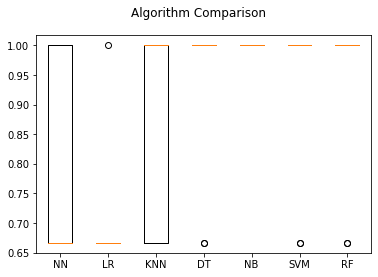

In [33]:

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
results

[array([1.        , 1.        , 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 1.        , 1.        , 0.66666667, 0.66666667]),
 array([1.        , 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667]),
 array([1.        , 1.        , 0.66666667, 1.        , 0.66666667,
        0.66666667, 1.        , 1.        , 1.        , 0.66666667]),
 array([1.        , 1.        , 1.        , 1.        , 0.66666667,
        0.66666667, 1.        , 1.        , 1.        , 1.        ]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 1.        , 1.        , 1.        , 0.66666667,
        0.66666667, 1.        , 1.        , 1.        , 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 0.66666667,
        0.66666667, 1.        , 1.        , 1.        , 1.        ])]